In [16]:
from darts.models import FFT
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from darts.datasets import TemperatureDataset
from darts.timeseries import TimeSeries 

In [70]:
data= pd.read_csv('./datasets/passenger.csv', parse_dates=['Month'],index_col='Month')
train= data[:int(0.8*(len(data)))]
test= data[int(0.8*(len(data))):]

# print(type(train))
# data_diff= data.diff().dropna()
train_ts= TimeSeries.from_dataframe(train)
test_ts= TimeSeries.from_dataframe(test)

**Choose optimal trend and nbr of frequencies to keeep**

In [128]:
def find_best_params(train_ts, test_ts):
    trend_choices= ['poly', 'exp']
    nb_freqs_choices=range(1,101)

    min_error= float('inf')
    best_trend= -1
    best_nb_freqs= -1
    for trend in trend_choices:
        for nb_freqs in nb_freqs_choices:
            model= FFT(trend=trend, nr_freqs_to_keep=nb_freqs)
            model.fit(train_ts)
            prediction= model.predict(len(test_ts))
            error= mean_absolute_error(prediction.values(), test_ts.values())
            if error< min_error:
                best_trend= trend
                best_nb_freqs= nb_freqs
                min_error= error
    return best_trend, best_nb_freqs




In [129]:
trend, nb_freqs= find_best_params(train_ts, test_ts)
print(trend, nb_freqs)
model = FFT(trend=trend, nr_freqs_to_keep=nb_freqs)
model.fit(train_ts)
pred_val = model.predict(len(test_ts))

poly 4


In [130]:
pred_val=[y for x in pred_val.values() for y in x]

In [131]:
real_values= data['Passengers'][int(0.8*(len(data))):]
# Mean Absolute Percentage Error
mape=mean_absolute_error(real_values,pred_val)
print(mape)

40.92309872410324


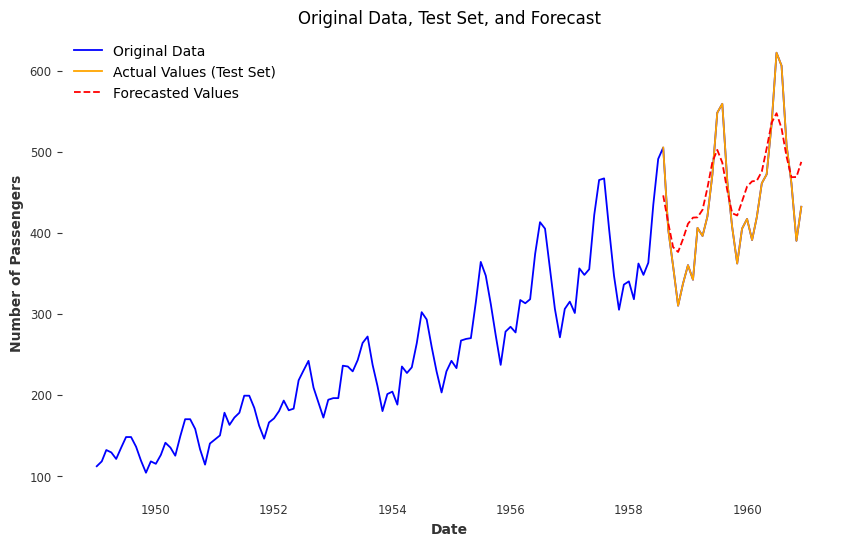

In [132]:
data= pd.read_csv('./datasets/passenger.csv')
combined_index = pd.concat([pd.Series(train.index), pd.Series(test.index)])
forecast_values = pred_val

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(combined_index, data["Passengers"], label="Original Data", color="blue")

# Plot the actual test data
plt.plot(test.index, test.values, label="Actual Values (Test Set)", color="orange")

# Plot the forecasted values
plt.plot(test.index, forecast_values, label="Forecasted Values", color="red", linestyle="dashed")

# Add title, legend, and labels
plt.title("Original Data, Test Set, and Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()